In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Necessary libraries

In [2]:
from __future__ import print_function
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
from torchsummary import summary

In [3]:
import warnings
warnings.simplefilter("ignore")
warnings.warn("deprecated", DeprecationWarning)
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [ ]:
# import albumentations as A
# import cv2

In [ ]:
# from albumentations.pytorch import ToTensorV2
# from PIL import Image
# import matplotlib.pyplot as plt

In [4]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


Load all the modules

In [5]:
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 9\ Assignment/dataload.py /content
#!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 9\ Assignment/model.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 9\ Assignment/model_v1.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 9\ Assignment/run.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 9\ Assignment/utils.py /content

In [6]:
import dataload
import model_v1
import run
import utils

from dataload import Draw, AlbumentationImageDataset, args, loader
from model_v1 import NetArch, return_summary
from run import Performance, scores
from utils import allot_device, Plots, plot_metrics

In [7]:
train_loader,test_loader = loader.load_data(128)
print(len(train_loader),len(test_loader))

100%|██████████| 170M/170M [00:05<00:00, 29.7MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
391 79


<Figure size 640x480 with 0 Axes>

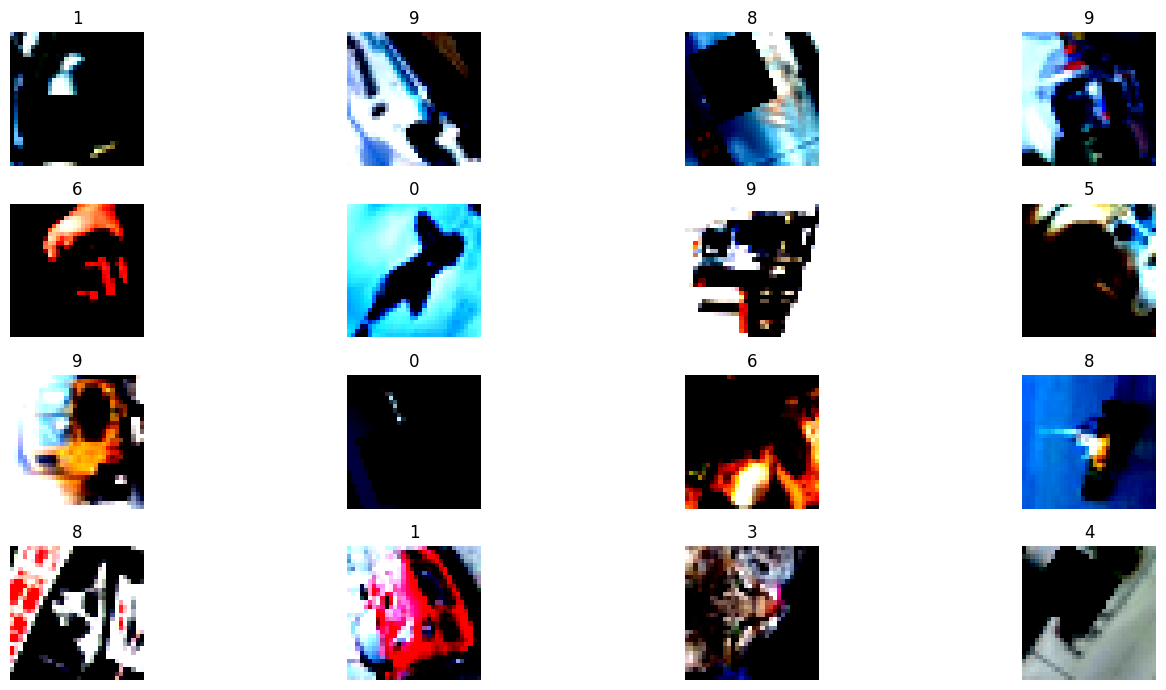

In [8]:
#train_data
Plots(None,17,train_loader).plot_images()

<Figure size 640x480 with 0 Axes>

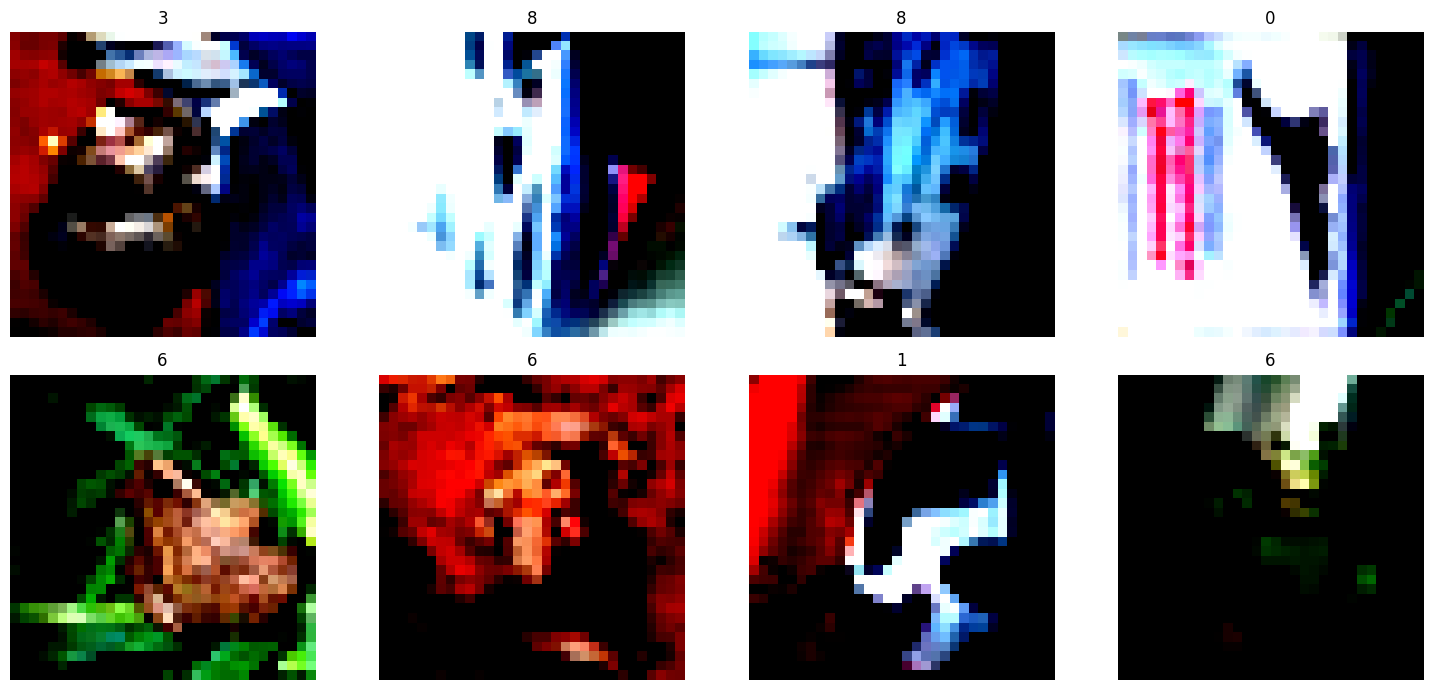

In [9]:
#test_data
Plots(None,9,test_loader).plot_images()

In [10]:
 # Setting up the device
device = allot_device(142)
print(f"{device} is available")

cuda is available


In [11]:
model = NetArch().to(device)

return_summary(model,device,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]             288
            Conv2d-6          [-1, 128, 32, 32]           4,096
              ReLU-7          [-1, 128, 32, 32]               0
       BatchNorm2d-8          [-1, 128, 32, 32]             256
           Dropout-9          [-1, 128, 32, 32]               0
           Conv2d-10           [-1, 64, 16, 16]          73,728
           Conv2d-11           [-1, 64, 16, 16]             576
           Conv2d-12          [-1, 128, 16, 16]           8,192
             ReLU-13          [-1, 128, 16, 16]               0
      BatchNorm2d-14          [-1, 128,

In [12]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=18, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 50
perf = Performance(device,model,(train_loader,test_loader),optimizer,criterion,[False,0.01])

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  perf.train()
  perf.test()

Epoch 1


Train: Loss=1.5353 Batch_id=390 Accuracy=35.31: 100%|██████████| 391/391 [00:46<00:00,  8.34it/s]


Test set: Average loss: 0.0113, Accuracy: 4743/10000 (47.43%)

Epoch 2


Train: Loss=1.4686 Batch_id=390 Accuracy=46.30: 100%|██████████| 391/391 [00:46<00:00,  8.39it/s]


Test set: Average loss: 0.0096, Accuracy: 5605/10000 (56.05%)

Epoch 3


Train: Loss=1.2403 Batch_id=390 Accuracy=51.38: 100%|██████████| 391/391 [00:46<00:00,  8.37it/s]


Test set: Average loss: 0.0090, Accuracy: 5935/10000 (59.35%)

Epoch 4


Train: Loss=1.1597 Batch_id=390 Accuracy=54.41: 100%|██████████| 391/391 [00:46<00:00,  8.48it/s]


Test set: Average loss: 0.0081, Accuracy: 6351/10000 (63.51%)

Epoch 5


Train: Loss=1.1334 Batch_id=390 Accuracy=56.77: 100%|██████████| 391/391 [00:47<00:00,  8.31it/s]


Test set: Average loss: 0.0073, Accuracy: 6724/10000 (67.24%)

Epoch 6


Train: Loss=1.0389 Batch_id=390 Accuracy=59.33: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s]


Test set: Average loss: 0.0065, Accuracy: 7074/10000 (70.74%)

Epoch 7


Train: Loss=0.9848 Batch_id=390 Accuracy=60.88: 100%|██████████| 391/391 [00:46<00:00,  8.44it/s]


Test set: Average loss: 0.0065, Accuracy: 7170/10000 (71.70%)

Epoch 8


Train: Loss=1.1305 Batch_id=390 Accuracy=62.17: 100%|██████████| 391/391 [00:46<00:00,  8.48it/s]


Test set: Average loss: 0.0063, Accuracy: 7175/10000 (71.75%)

Epoch 9


Train: Loss=1.1047 Batch_id=390 Accuracy=63.43: 100%|██████████| 391/391 [00:46<00:00,  8.46it/s]


Test set: Average loss: 0.0059, Accuracy: 7380/10000 (73.80%)

Epoch 10


Train: Loss=0.8653 Batch_id=390 Accuracy=64.36: 100%|██████████| 391/391 [00:45<00:00,  8.60it/s]


Test set: Average loss: 0.0056, Accuracy: 7529/10000 (75.29%)

Epoch 11


Train: Loss=0.9780 Batch_id=390 Accuracy=65.27: 100%|██████████| 391/391 [00:46<00:00,  8.38it/s]


Test set: Average loss: 0.0055, Accuracy: 7637/10000 (76.37%)

Epoch 12


Train: Loss=1.1043 Batch_id=390 Accuracy=65.99: 100%|██████████| 391/391 [00:45<00:00,  8.55it/s]


Test set: Average loss: 0.0053, Accuracy: 7694/10000 (76.94%)

Epoch 13


Train: Loss=1.0444 Batch_id=390 Accuracy=66.60: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s]


Test set: Average loss: 0.0052, Accuracy: 7712/10000 (77.12%)

Epoch 14


Train: Loss=0.8458 Batch_id=390 Accuracy=67.50: 100%|██████████| 391/391 [00:45<00:00,  8.57it/s]


Test set: Average loss: 0.0052, Accuracy: 7734/10000 (77.34%)

Epoch 15


Train: Loss=0.7855 Batch_id=390 Accuracy=67.68: 100%|██████████| 391/391 [00:45<00:00,  8.59it/s]


Test set: Average loss: 0.0050, Accuracy: 7834/10000 (78.34%)

Epoch 16


Train: Loss=0.9550 Batch_id=390 Accuracy=68.53: 100%|██████████| 391/391 [00:45<00:00,  8.66it/s]


Test set: Average loss: 0.0048, Accuracy: 7880/10000 (78.80%)

Epoch 17


Train: Loss=1.0515 Batch_id=390 Accuracy=68.51: 100%|██████████| 391/391 [00:45<00:00,  8.66it/s]


Test set: Average loss: 0.0048, Accuracy: 7968/10000 (79.68%)

Epoch 18


Train: Loss=0.9236 Batch_id=390 Accuracy=69.20: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]


Test set: Average loss: 0.0047, Accuracy: 7984/10000 (79.84%)

Epoch 19


Train: Loss=0.6850 Batch_id=390 Accuracy=69.43: 100%|██████████| 391/391 [00:45<00:00,  8.66it/s]


Test set: Average loss: 0.0045, Accuracy: 8019/10000 (80.19%)

Epoch 20


Train: Loss=0.9520 Batch_id=390 Accuracy=70.21: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s]


Test set: Average loss: 0.0045, Accuracy: 8054/10000 (80.54%)

Epoch 21


Train: Loss=1.0138 Batch_id=390 Accuracy=70.17: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]


Test set: Average loss: 0.0045, Accuracy: 8033/10000 (80.33%)

Epoch 22


Train: Loss=0.8624 Batch_id=390 Accuracy=70.89: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]


Test set: Average loss: 0.0044, Accuracy: 8086/10000 (80.86%)

Epoch 23


Train: Loss=0.7358 Batch_id=390 Accuracy=71.16: 100%|██████████| 391/391 [00:46<00:00,  8.44it/s]


Test set: Average loss: 0.0043, Accuracy: 8146/10000 (81.46%)

Epoch 24


Train: Loss=0.9110 Batch_id=390 Accuracy=71.74: 100%|██████████| 391/391 [00:46<00:00,  8.39it/s]


Test set: Average loss: 0.0043, Accuracy: 8131/10000 (81.31%)

Epoch 25


Train: Loss=0.9064 Batch_id=390 Accuracy=71.79: 100%|██████████| 391/391 [00:46<00:00,  8.35it/s]


Test set: Average loss: 0.0042, Accuracy: 8168/10000 (81.68%)

Epoch 26


Train: Loss=0.8861 Batch_id=390 Accuracy=72.14: 100%|██████████| 391/391 [00:47<00:00,  8.31it/s]


Test set: Average loss: 0.0043, Accuracy: 8135/10000 (81.35%)

Epoch 27


Train: Loss=0.6863 Batch_id=390 Accuracy=72.24: 100%|██████████| 391/391 [00:45<00:00,  8.56it/s]


Test set: Average loss: 0.0042, Accuracy: 8192/10000 (81.92%)

Epoch 28


Train: Loss=0.8740 Batch_id=390 Accuracy=72.42: 100%|██████████| 391/391 [00:45<00:00,  8.55it/s]


Test set: Average loss: 0.0041, Accuracy: 8214/10000 (82.14%)

Epoch 29


Train: Loss=0.6988 Batch_id=390 Accuracy=72.88: 100%|██████████| 391/391 [00:46<00:00,  8.41it/s]


Test set: Average loss: 0.0041, Accuracy: 8278/10000 (82.78%)

Epoch 30


Train: Loss=0.7877 Batch_id=390 Accuracy=73.05: 100%|██████████| 391/391 [00:46<00:00,  8.38it/s]


Test set: Average loss: 0.0039, Accuracy: 8328/10000 (83.28%)

Epoch 31


Train: Loss=0.7993 Batch_id=390 Accuracy=73.34: 100%|██████████| 391/391 [00:46<00:00,  8.40it/s]


Test set: Average loss: 0.0039, Accuracy: 8305/10000 (83.05%)

Epoch 32


Train: Loss=0.9339 Batch_id=390 Accuracy=73.55: 100%|██████████| 391/391 [00:46<00:00,  8.46it/s]


Test set: Average loss: 0.0040, Accuracy: 8265/10000 (82.65%)

Epoch 33


Train: Loss=1.0427 Batch_id=390 Accuracy=73.31: 100%|██████████| 391/391 [00:47<00:00,  8.30it/s]


Test set: Average loss: 0.0039, Accuracy: 8345/10000 (83.45%)

Epoch 34


Train: Loss=0.6317 Batch_id=390 Accuracy=74.12: 100%|██████████| 391/391 [00:46<00:00,  8.34it/s]


Test set: Average loss: 0.0038, Accuracy: 8378/10000 (83.78%)

Epoch 35


Train: Loss=0.7858 Batch_id=390 Accuracy=74.15: 100%|██████████| 391/391 [00:48<00:00,  8.08it/s]


Test set: Average loss: 0.0040, Accuracy: 8308/10000 (83.08%)

Epoch 36


Train: Loss=0.8128 Batch_id=390 Accuracy=74.26: 100%|██████████| 391/391 [00:46<00:00,  8.46it/s]


Test set: Average loss: 0.0038, Accuracy: 8380/10000 (83.80%)

Epoch 37


Train: Loss=0.6394 Batch_id=390 Accuracy=74.30: 100%|██████████| 391/391 [00:46<00:00,  8.40it/s]


Test set: Average loss: 0.0038, Accuracy: 8357/10000 (83.57%)

Epoch 38


Train: Loss=0.7785 Batch_id=390 Accuracy=74.17: 100%|██████████| 391/391 [00:45<00:00,  8.61it/s]


Test set: Average loss: 0.0038, Accuracy: 8369/10000 (83.69%)

Epoch 39


Train: Loss=0.7523 Batch_id=390 Accuracy=74.94: 100%|██████████| 391/391 [00:47<00:00,  8.20it/s]


Test set: Average loss: 0.0037, Accuracy: 8434/10000 (84.34%)

Epoch 40


Train: Loss=0.5305 Batch_id=390 Accuracy=74.98: 100%|██████████| 391/391 [00:45<00:00,  8.64it/s]


Test set: Average loss: 0.0037, Accuracy: 8407/10000 (84.07%)

Epoch 41


Train: Loss=0.9576 Batch_id=390 Accuracy=75.15: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]


Test set: Average loss: 0.0037, Accuracy: 8418/10000 (84.18%)

Epoch 42


Train: Loss=0.7838 Batch_id=390 Accuracy=75.15: 100%|██████████| 391/391 [00:45<00:00,  8.52it/s]


Test set: Average loss: 0.0037, Accuracy: 8373/10000 (83.73%)

Epoch 43


Train: Loss=0.6982 Batch_id=390 Accuracy=75.28: 100%|██████████| 391/391 [00:47<00:00,  8.24it/s]


Test set: Average loss: 0.0036, Accuracy: 8427/10000 (84.27%)

Epoch 44


Train: Loss=0.8419 Batch_id=390 Accuracy=75.38: 100%|██████████| 391/391 [00:45<00:00,  8.52it/s]


Test set: Average loss: 0.0037, Accuracy: 8407/10000 (84.07%)

Epoch 45


Train: Loss=0.6928 Batch_id=390 Accuracy=75.56: 100%|██████████| 391/391 [00:46<00:00,  8.49it/s]


Test set: Average loss: 0.0036, Accuracy: 8449/10000 (84.49%)

Epoch 46


Train: Loss=0.7292 Batch_id=390 Accuracy=75.72: 100%|██████████| 391/391 [00:48<00:00,  8.08it/s]


Test set: Average loss: 0.0037, Accuracy: 8447/10000 (84.47%)

Epoch 47


Train: Loss=0.6589 Batch_id=390 Accuracy=75.85: 100%|██████████| 391/391 [00:45<00:00,  8.51it/s]


Test set: Average loss: 0.0035, Accuracy: 8485/10000 (84.85%)

Epoch 48


Train: Loss=0.5504 Batch_id=390 Accuracy=75.92: 100%|██████████| 391/391 [00:45<00:00,  8.55it/s]


Test set: Average loss: 0.0036, Accuracy: 8454/10000 (84.54%)

Epoch 49


Train: Loss=0.8186 Batch_id=390 Accuracy=75.63: 100%|██████████| 391/391 [00:48<00:00,  8.10it/s]


Test set: Average loss: 0.0035, Accuracy: 8515/10000 (85.15%)

Epoch 50


Train: Loss=0.6411 Batch_id=390 Accuracy=75.80: 100%|██████████| 391/391 [00:46<00:00,  8.39it/s]


Test set: Average loss: 0.0035, Accuracy: 8475/10000 (84.75%)



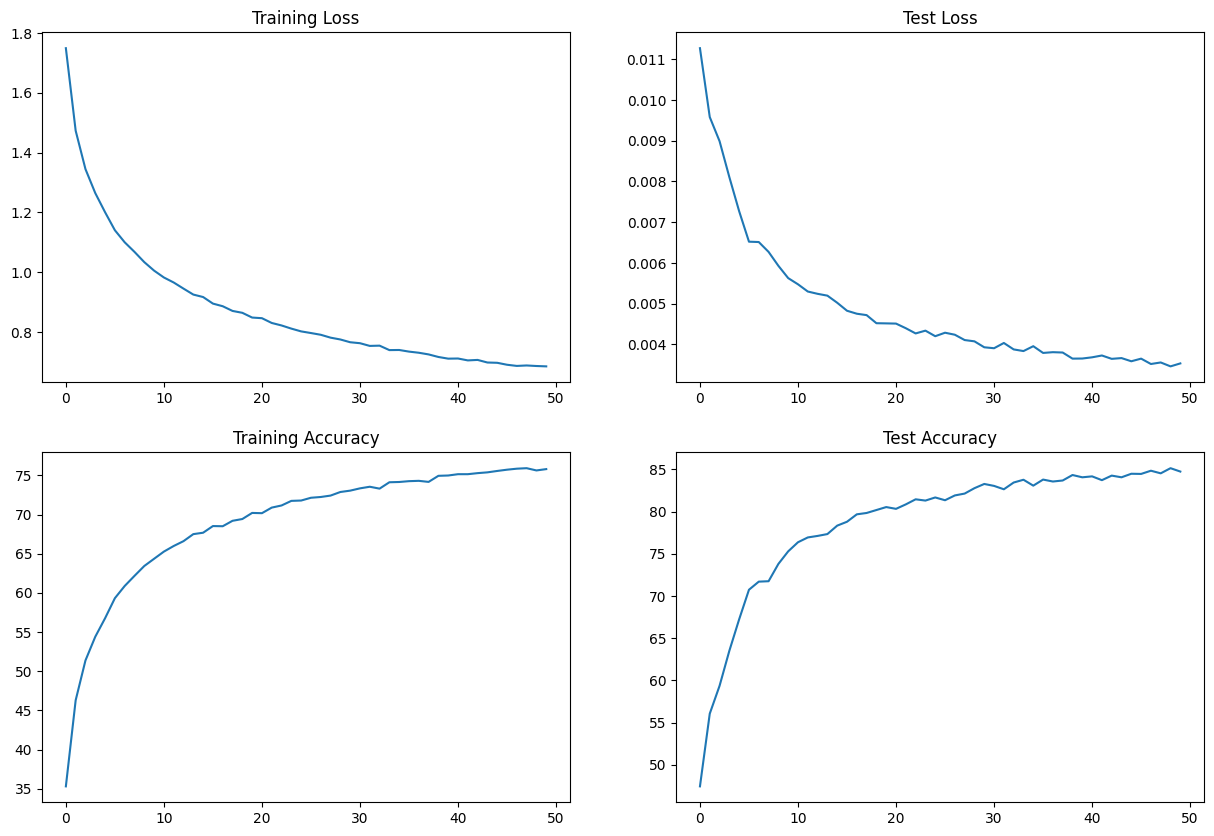

In [13]:
metrics = scores()
plot_metrics(metrics)

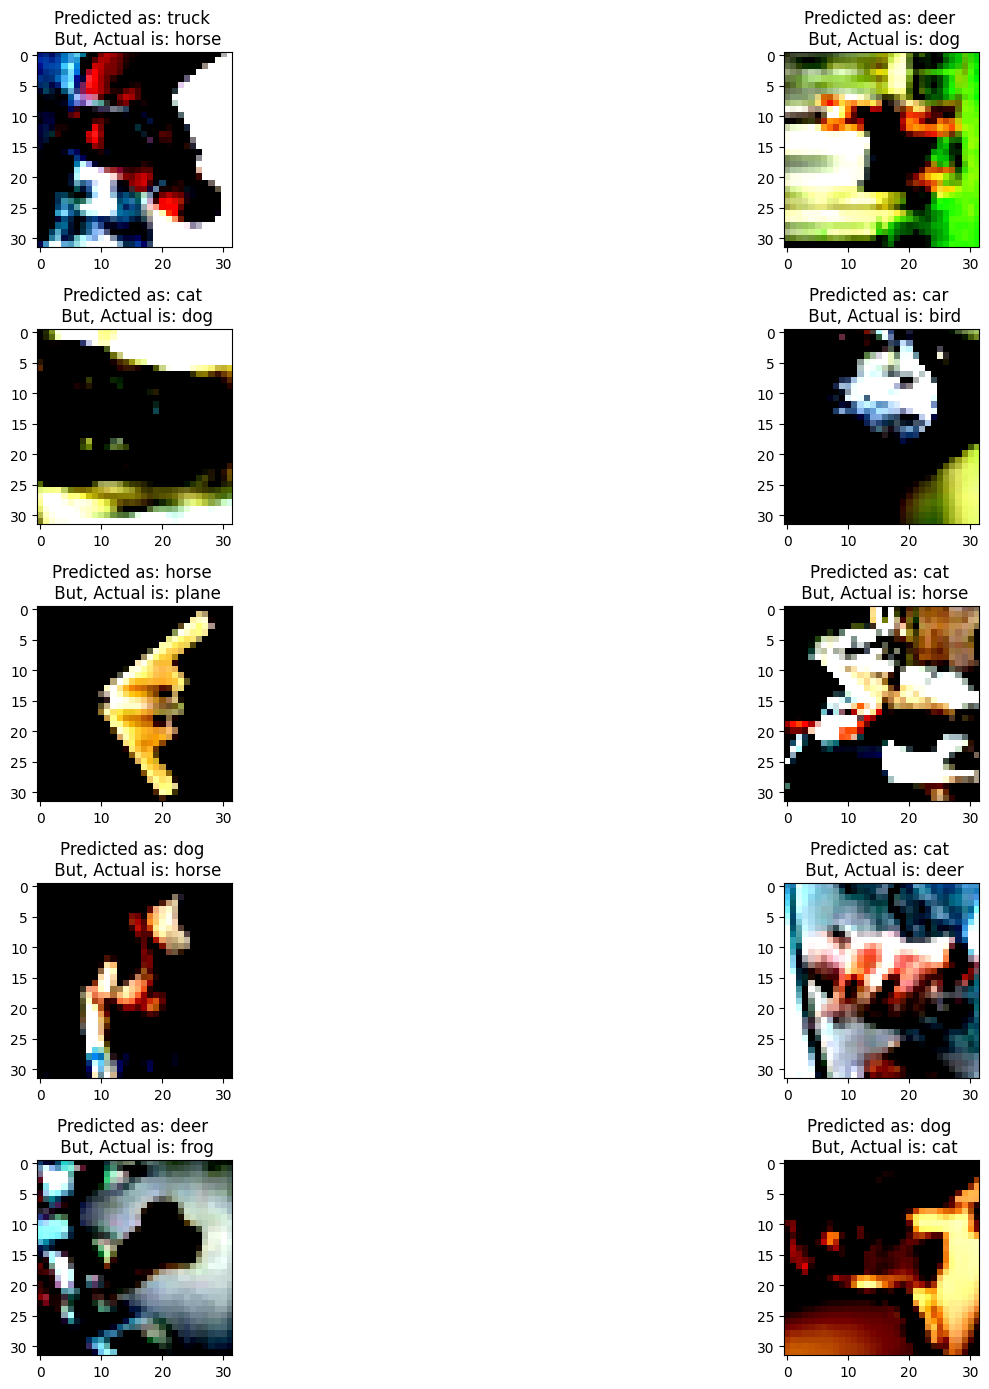

In [14]:
Plots((model,test_loader,device,10)).mis_classified()